In [1]:
import pandas as pd

df = pd.read_csv(r"Hotels_data_Changed.csv")
df.columns
df.head(5)

,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,WeekDay,DiscountDiff,DiscountPerc,DayDiff
0,1,2015-07-17,2015-08-12,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,Wed,138,11.714771,26
1,1,2015-07-17,2015-08-19,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,Wed,131,11.769991,33
2,1,2015-07-17,2015-08-13,5,4370,4240,1,3,The Peninsula New York,5,Thu,130,2.974828,27
3,1,2015-07-17,2015-07-26,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,Sun,72,4.140311,9
4,1,2015-07-17,2015-08-12,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,Wed,67,3.852789,26


In [2]:
relevantColumns = ['Hotel Name', 'DayDiff', 'Checkin Date', 'Snapshot Date', 'WeekDay', 'Discount Code','DiscountPerc']
relevantColumnsFeaturesWDiscoutCode = relevantColumns[0:6]
relevantColumnsFeatures = relevantColumns[0:5]

df = df[relevantColumns]
df.sort_values(['DiscountPerc'], ascending=False, inplace=True)
df.drop_duplicates(subset=relevantColumnsFeatures, keep='first', inplace=True)
df.dropna()
df.to_csv(r"Hotels_data_filtered.csv")
df.head(5)

,Hotel Name,DayDiff,Checkin Date,Snapshot Date,WeekDay,Discount Code,DiscountPerc
26262,Hyatt Place Flushing LaGuardia Airport,1,2015-09-03,2015-09-02,Thu,1,68.425842
69313,Manhattan Broadway Budget Hotel,21,2015-10-22,2015-10-01,Thu,3,68.305669
68905,Manhattan Broadway Budget Hotel,19,2015-10-20,2015-10-01,Tue,2,66.615761
146691,Comfort Inn Times Square West,5,2015-12-01,2015-11-26,Tue,3,56.410256
140216,New York Hilton Midtown,2,2015-11-21,2015-11-19,Sat,4,54.636591


In [3]:
#Convert the data to numeric
from sklearn import preprocessing

#Hotel Name
le = preprocessing.LabelEncoder()
le.fit(df['Hotel Name'])
df['Hotel Name'] = le.transform(df['Hotel Name']) 

#WeekDay
le = preprocessing.LabelEncoder()
le.fit(df['WeekDay'])
df['WeekDay'] = le.transform(df['WeekDay']) 

#Snapshot Date
le = preprocessing.LabelEncoder()
le.fit(df['Snapshot Date'])
df['Snapshot Date'] = le.transform(df['Snapshot Date']) 

#Checkin Date
le = preprocessing.LabelEncoder()
le.fit(df['Checkin Date'])
df['Checkin Date'] = le.transform(df['Checkin Date']) 

In [4]:
# Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


features = df[relevantColumnsFeatures]
target = df['Discount Code']

f_train, f_test, t_train, t_test = train_test_split(features, target, random_state=1)

nb = GaussianNB()

nb.fit(f_train, t_train)
predicted = nb.predict(f_test)
print(accuracy_score(t_test, predicted))

0.31936626281453867


In [5]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

matrix=pd.DataFrame(
    confusion_matrix(t_test, predicted),
    columns=['Predicted 1', 'Predicted 2','Predicted 3','Predicted 4'],
    index=['True 1', 'True 2','True 3','True 4']
)

print("-------------------------STATISTICS-------------------------")
print("confusion_matrix:")
print(matrix)
print("------------------------------------------------------------")
# accuracy
accuracy=accuracy_score(t_test, predicted)
print("accuracy is: %s" %(accuracy))
print("------------------------------------------------------------")
# TP
tp = np.diag(matrix)
print("TP is: %s" %(tp))
print("------------------------------------------------------------")
# FP
fp=matrix.sum(axis=0)-np.diag(matrix)
print("FP:")
print(fp)
print("------------------------------------------------------------")
# FN
fn = matrix.sum(axis=1) - np.diag(matrix)
print("FN:")
print(fn)
print("------------------------------------------------------------")
# ROC
print("ROC:")
# This is the ROC curve
predictProb = nb.predict_proba(f_test)
skplt.metrics.plot_roc_curve(t_test, predictProb)
plt.show()
print("------------------------------------------------------------")
print()

-------------------------STATISTICS-------------------------
confusion_matrix:
        Predicted 1  Predicted 2  Predicted 3  Predicted 4
True 1          594         4963         1105            0
True 2          589         6086         1686            0
True 3          394         5210         1887            0
True 4          422         2978          911            0
------------------------------------------------------------
accuracy is: 0.31936626281453867
------------------------------------------------------------
TP is: [ 594 6086 1887    0]
------------------------------------------------------------
FP:
Predicted 1     1405
Predicted 2    13151
Predicted 3     3702
Predicted 4        0
dtype: int64
------------------------------------------------------------
FN:
True 1    6068
True 2    2275
True 3    5604
True 4    4311
dtype: int64
------------------------------------------------------------
ROC:


------------------------------------------------------------



In [6]:
from sklearn.tree import DecisionTreeClassifier

tree_cls = DecisionTreeClassifier()
tree_cls.fit(f_train, t_train)
predictedTree = tree_cls.predict(f_test)
print(accuracy_score(t_test, predicted))

0.31936626281453867


In [7]:
#The must impact feature
tree_cls.feature_importances_

array([0.36416224, 0.17104809, 0.20446254, 0.22653368, 0.03379346])

-------------------------STATISTICS-------------------------
confusion_matrix:
        Predicted 1  Predicted 2  Predicted 3  Predicted 4
True 1         5099          758          474          331
True 2          695         6565          735          366
True 3          449          828         5806          408
True 4          297          371          450         3193
------------------------------------------------------------
accuracy is: 0.7702889095992544
------------------------------------------------------------
TP is: [5099 6565 5806 3193]
------------------------------------------------------------
FP:
Predicted 1    1441
Predicted 2    1957
Predicted 3    1659
Predicted 4    1105
dtype: int64
------------------------------------------------------------
FN:
True 1    1563
True 2    1796
True 3    1685
True 4    1118
dtype: int64
------------------------------------------------------------
ROC:


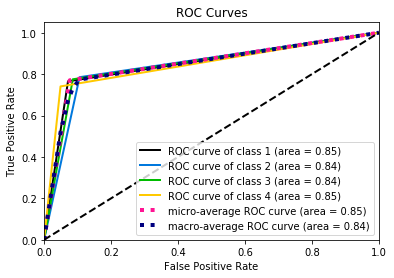

------------------------------------------------------------



In [8]:
matrix=pd.DataFrame(
    confusion_matrix(t_test, predictedTree),
    columns=['Predicted 1', 'Predicted 2','Predicted 3','Predicted 4'],
    index=['True 1', 'True 2','True 3','True 4']
)

print("-------------------------STATISTICS-------------------------")
print("confusion_matrix:")
print(matrix)
print("------------------------------------------------------------")
# accuracy
accuracy=accuracy_score(t_test, predictedTree)
print("accuracy is: %s" %(accuracy))
print("------------------------------------------------------------")
# TP
tp = np.diag(matrix)
print("TP is: %s" %(tp))
print("------------------------------------------------------------")
# FP
fp=matrix.sum(axis=0)-np.diag(matrix)
print("FP:")
print(fp)
print("------------------------------------------------------------")
# FN
fn = matrix.sum(axis=1) - np.diag(matrix)
print("FN:")
print(fn)
print("------------------------------------------------------------")
# ROC
print("ROC:")
# This is the ROC curve
predictProb2 = tree_cls.predict_proba(f_test)
skplt.metrics.plot_roc_curve(t_test, predictProb2)
plt.show()
print("------------------------------------------------------------")
print()